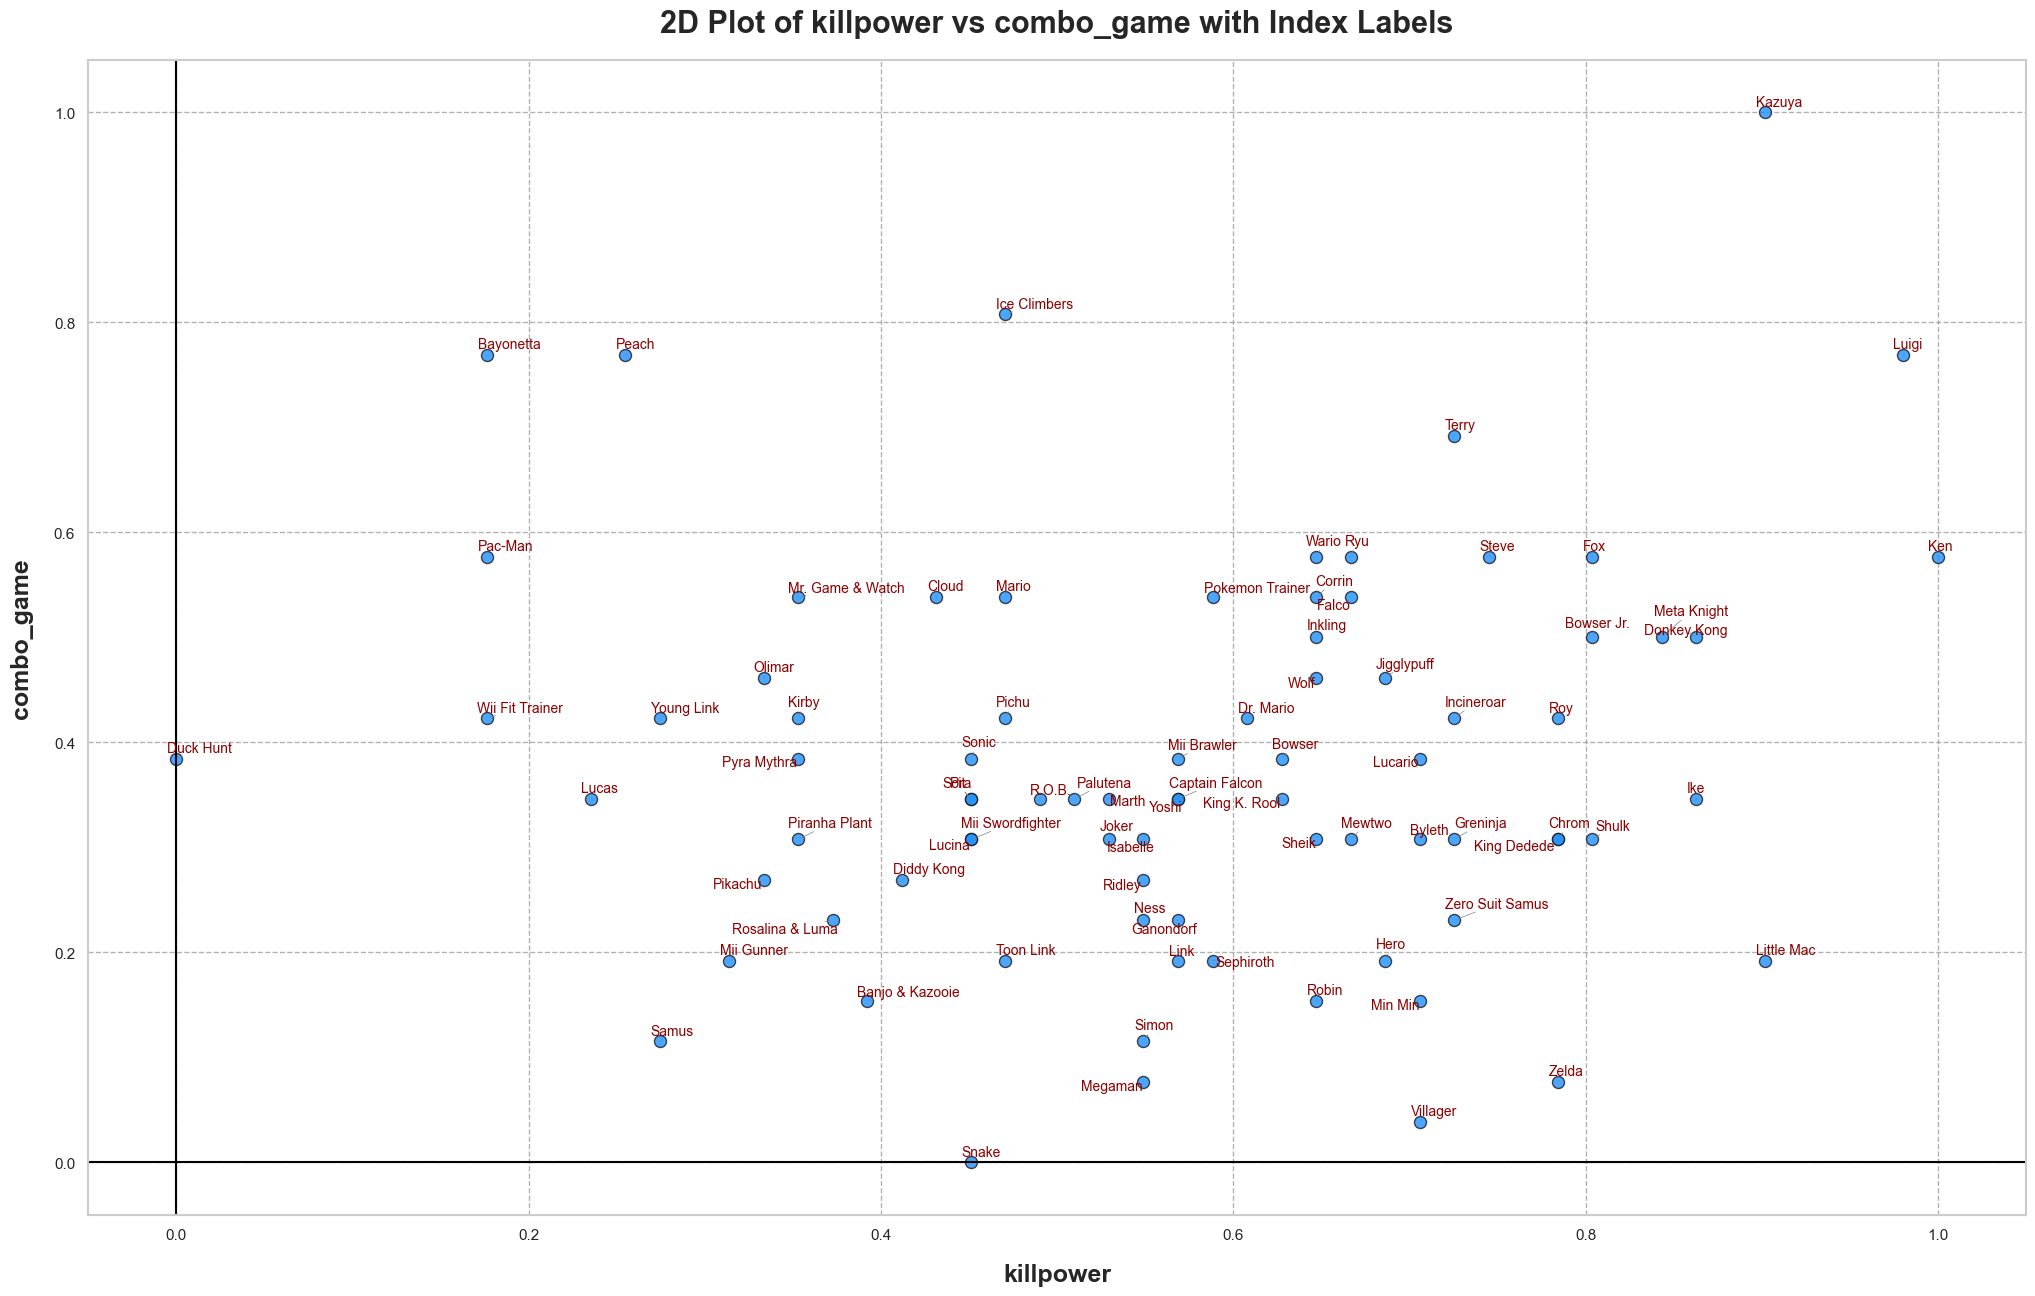

,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,popularity,pro_scene,online_winrate
name,,,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.333333,0.827842,0.386534,0.708005,0.446222
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,0.555556,0.876340,0.391521,0.297768,0.620889
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.222222,0.482454,0.349127,0.408127,0.482222
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.333333,0.722526,0.498753,0.754413,0.612444
Yoshi,0.575342,0.750,0.25,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.444444,0.798536,0.433915,0.780393,0.580889
Kirby,0.232877,0.250,0.25,0.00,0.250,0.423077,0.352941,0.351852,0.150,0.111111,0.902752,0.224439,0.240480,0.257778
Fox,0.205479,0.250,0.00,0.25,0.875,0.576923,0.803922,0.037037,0.350,0.000000,0.346694,0.199501,0.838459,0.400444
Pikachu,0.232877,1.000,0.25,0.50,0.625,0.269231,0.333333,0.685185,0.175,0.777778,0.341482,0.331671,0.738981,0.397333
Luigi,0.479452,0.250,0.00,0.25,0.250,0.769231,0.980392,0.166667,0.150,0.888889,0.443963,0.478803,0.569113,0.754222


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.spatial import distance
from adjustText import adjust_text


# Set the display options
pd.set_option('display.max_rows', None)  # Unrestricted number of rows
pd.set_option('display.max_columns', None)  # Unrestricted number of columns
pd.set_option('display.width', None)  # Use maximum screen width
pd.set_option('display.max_colwidth', None)  # Unrestricted column width

compute_radars = True
compute_close_graphs = False
show_cluster_metrics = False

# normalisation
def normalize_data(df):
    df["weight"] = (df['weight'] - df['weight'].min()) / (df['weight'].max() - df['weight'].min())
    df["recovery"] = (df['recovery'] - df['recovery'].min()) / (df['recovery'].max() - df['recovery'].min())
    df["speed"] = (df['speed'] - df['speed'].min()) / (df['speed'].max() - df['speed'].min())
    df["combo_game"] = (df['combo_game'] - df['combo_game'].min()) / (df['combo_game'].max() - df['combo_game'].min())
    df["projectiles"] = (df['projectiles'] - df['projectiles'].min()) / (df['projectiles'].max() - df['projectiles'].min())
    df["killpower"] = 1 - ((df['killpower'] - df['killpower'].min()) / (df['killpower'].max() - df['killpower'].min()))
    df["ledgetrap"] = (df['ledgetrap'] - df['ledgetrap'].min()) / (df['ledgetrap'].max() - df['ledgetrap'].min())
    df["edgeguard"] = (df['edgeguard'] - df['edgeguard'].min()) / (df['edgeguard'].max() - df['edgeguard'].min())
    df["spacing"] = (df['spacing'] - df['spacing'].min()) / (df['spacing'].max() - df['spacing'].min())
    df["cheese"] = (df['cheese'] - df['cheese'].min()) / (df['cheese'].max() - df['cheese'].min())
    df["popularity"] = (df['popularity'] - df['popularity'].min()) / (df['popularity'].max() - df['popularity'].min())
    df["pro_scene"] = (df['pro_scene'] - df['pro_scene'].min()) / (df['pro_scene'].max() - df['pro_scene'].min())
    df["online_winrate"] = (df['online_winrate'] - df['online_winrate'].min()) / (df['online_winrate'].max() - df['online_winrate'].min())
    df["easy"] = 1 - ((df['easy'] - df['easy'].min()) / (df['easy'].max() - df['easy'].min()))
    return df

def prepare_data(df):
    """Standardize the data directly on the original DataFrame."""
    df['killpower'] = df['killpower'] * -1
    df['easy'] = df['easy'] * -1
    # scaler = StandardScaler()
    scaler = MinMaxScaler()
    df[df.columns] = scaler.fit_transform(df)  # Apply scaling directly to the DataFrame
    
    return df

def read_data(file='smash.csv'):
    df = pd.read_csv(file, sep=',')
    df['name'] = df['name'].str.strip()
    df = df.set_index('name')
    df = df.drop(columns="id")
    df = df.replace({'': 0, ' x': 0, 'x': 0, 'x ': 0, np.nan: 0, ' ':0, '  ':0})
    for column in ['weight', 'recovery', 'speed', 'combo_game', 'projectiles', 'killpower', 'ledgetrap', 'edgeguard', 'spacing', 'cheese', 'easy', 'popularity', 'pro_scene', 'online_winrate']:
        df[column] = pd.to_numeric(df[column], errors='coerce')
    return df

def drop_columns(df, columns):
    """Drop specified columns from DataFrame."""
    return df.drop(columns=columns)

def plot_with_index_labels(df, col_x, col_y):
    """
    Plots a 2D scatter plot of two columns from a DataFrame, labeling each point with its index.
    The plot is centered around 0 and styled for better aesthetics. Uses adjustText to prevent label overlaps.
    The axes are made more visible with thicker lines and more prominent colors.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    col_x (str): The name of the column to be used as the x-axis.
    col_y (str): The name of the column to be used as the y-axis.
    """
    x = df[col_x]
    y = df[col_y]

    plt.figure(figsize=(25, 15))
    
    # Enhanced scatter plot with seaborn style and larger, colored points
    sns.set(style="whitegrid")
    plt.scatter(x, y, c='dodgerblue', s=75, alpha=0.8, edgecolor='k', linewidth=1)

    # Collect all text objects to adjust them later
    texts = []
    for i in range(len(df)):
        texts.append(plt.text(x[i], y[i], str(df.index[i]), fontsize=10, 
                              ha='right', va='bottom', color='darkred'))

    # Adjust text to avoid overlaps
    adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

    # Set limits slightly beyond the data range for better visual spacing
    plt.xlim(x.min() - 0.05, x.max() + 0.05)
    plt.ylim(y.min() - 0.05, y.max() + 0.05)

    # Add gridlines for better readability
    plt.grid(True, linestyle='--', alpha=0.6, color='gray')

    # Draw thicker gridlines and centerlines
    plt.axhline(0, color='black', linewidth=1.5)
    plt.axvline(0, color='black', linewidth=1.5)

    # Increase the thickness and visibility of the plot's borders
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)

    # Add axis labels and title with larger fonts
    plt.xlabel(col_x, fontsize=18, fontweight='bold', labelpad=15)
    plt.ylabel(col_y, fontsize=18, fontweight='bold', labelpad=15)
    plt.title(f'2D Plot of {col_x} vs {col_y} with Index Labels', fontsize=22, fontweight='bold', pad=20)
    
    # Save and display the plot
    plt.savefig("results/combo_vs_killpower.png", dpi=300, bbox_inches='tight')
    plt.show()

df = read_data()
df = prepare_data(df)
columns_order = ['weight', 'recovery', 'spacing', 'projectiles', 'speed', 'combo_game', 'killpower', 'edgeguard', 'ledgetrap', 'cheese', 'easy', 'popularity', 'pro_scene', 'online_winrate']
df = df[columns_order]

plot_with_index_labels(df, 'killpower', 'combo_game')

df

In [2]:
def plot_character_vs_median(df, character_name):
    try:
        # Get data for specific character
        character_data = df.loc[character_name].tolist() + [df.loc[character_name].tolist()[0]]

        # Calculate the median data
        median_data = df.median().tolist() + [df.median().tolist()[0]]

        # Compute angle for each axis
        num_vars = len(df.columns)
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist() + [0]

        fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
        # Plot for specific character
        ax.fill(angles, character_data, color='red', alpha=0.25)
        ax.plot(angles, character_data, color='red', label=character_name)
        # Plot for median
        ax.fill(angles, median_data, color='green', alpha=0.25)
        ax.plot(angles, median_data, color='green', label='Median')

        # Set the range of the radar
        ax.set_ylim(0, 1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(df.columns, fontsize=13)
        ax.set_yticklabels([])
        ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.2))
        
        # Save the plot as an image file
        plt.title(f"{character_name} vs Median", size=20)
        plt.savefig(f"character_radars/{character_name}_vs_median.png")  # Save the figure to a file
        plt.close(fig)  # Close the figure to free up memory

    except KeyError:
        print(f"Character '{character_name}' not found in the DataFrame. Please check the character name and try again.")

# Plot and save radar charts for each character
if compute_radars:
    for character_name in df.index:
        plot_character_vs_median(df, character_name)

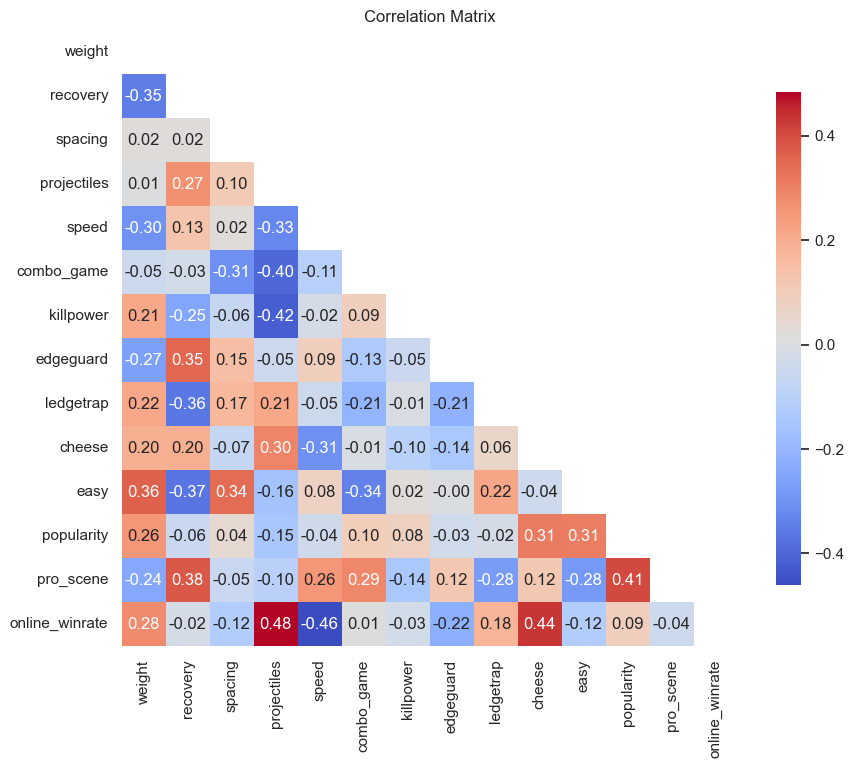

In [3]:
def show_correlations(df):
    correlation_matrix = df.corr()

    # Create a mask to hide the upper triangle of the correlation matrix
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

    plt.figure(figsize=(10, 8))
    # Plot the heatmap with the mask and correct aspect ratio
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title('Correlation Matrix')
    plt.savefig("results/correlation_matrix.png", dpi=300, bbox_inches='tight')
    plt.show()
    
show_correlations(df)

In [4]:
from sklearn.linear_model import LinearRegression

# Assuming df is your original DataFrame
# List the columns you want to exclude, besides 'score'
columns_to_exclude = ['easy', 'popularity', 'online_winrate', 'edgeguard', 'ledgetrap', 'pro_scene']  # Replace with your actual column names

# Create X as a copy of df without the excluded columns and 'score'
X = df.drop(columns=columns_to_exclude)
y = df['pro_scene']

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Get the absolute values of the coefficients to determine feature importance
importance = model.coef_

# Create a DataFrame to display the feature names alongside their importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort the features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
importance_df


,Feature,Importance
5,combo_game,0.393928
4,speed,0.249060
1,recovery,0.247334
7,cheese,0.121931
2,spacing,0.029035
3,projectiles,-0.033897
0,weight,-0.081783
6,killpower,-0.089260


C:\Users\Gais\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Cross-validated MSE: 0.041635693463623946
Training MSE: 0.016038680374560247
Random Forest Test MSE: 0.03705836795267799


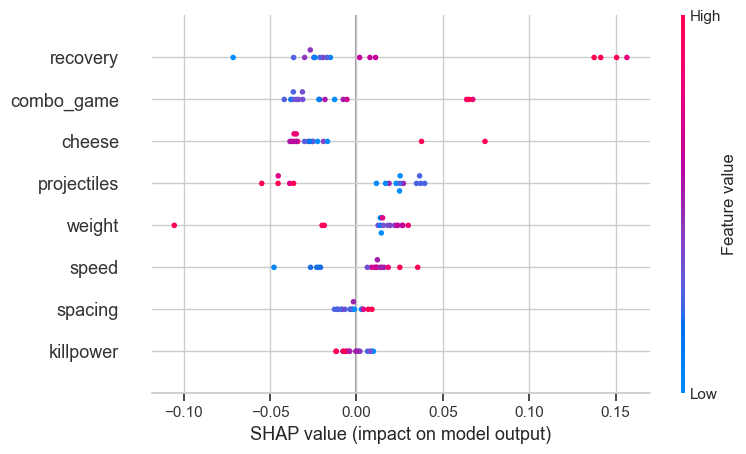

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import shap

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
)

# Cross-Validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()  # Cross-validated MSE
print(f"Cross-validated MSE: {cv_mse}")

# Train the model on the full training set
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate MSE on training data
y_train_pred = rf_model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
print(f"Training MSE: {mse_train}")

# Evaluate the model on the test set
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Test MSE: {mse_rf}")

# Initialize the SHAP explainer
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Plot summary of feature importance using SHAP
shap.summary_plot(shap_values, X_test)

       Feature  Mean SHAP Importance
1     recovery              0.055034
7       cheese              0.041581
5   combo_game              0.037739
3  projectiles              0.030178
4        speed              0.027494
0       weight              0.025481
6    killpower              0.008885
2      spacing              0.008657


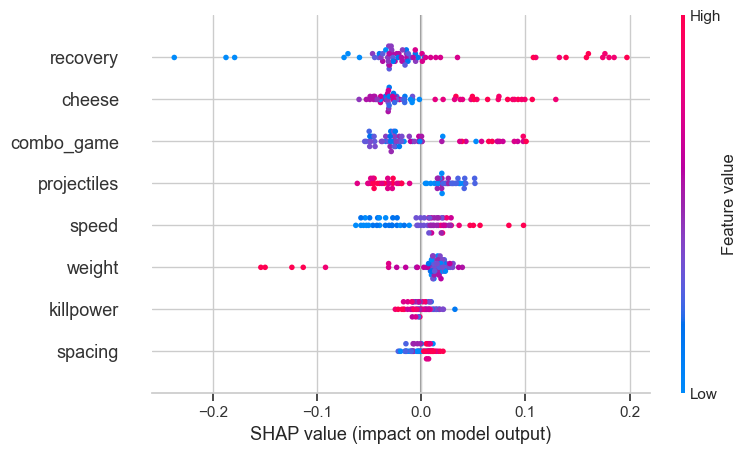

In [6]:
import shap
import numpy as np
import pandas as pd

# Initialize variables to store SHAP values
num_runs = 1000
shap_values_all = np.zeros((num_runs, X_train.shape[0], X_train.shape[1]))

for i in range(num_runs):
    rf_model = RandomForestRegressor(n_estimators=100, random_state=i)
    rf_model.fit(X_train, y_train)
    
    # Compute SHAP values for the training data
    explainer = shap.TreeExplainer(rf_model)
    shap_values = explainer.shap_values(X_train)
    
    # Store the SHAP values for each run
    shap_values_all[i, :, :] = shap_values

# Average SHAP values over all runs
mean_shap_values = np.mean(shap_values_all, axis=0)

# Aggregate SHAP values by feature importance
mean_abs_shap_values = np.abs(mean_shap_values).mean(axis=0)

# Create a DataFrame for averaged SHAP feature importance
shap_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Mean SHAP Importance': mean_abs_shap_values
}).sort_values(by='Mean SHAP Importance', ascending=False)

# Display the averaged SHAP feature importance
print(shap_importance_df)

# Optionally, plot the SHAP summary plot for the averaged SHAP values
shap.summary_plot(mean_shap_values, X_train)


In [7]:
from sklearn.metrics import silhouette_samples

def calculate_clustering_metrics(df, k_range):
    """Calculate KMeans clustering metrics over a range of k values."""
    sse = []
    silhouette_scores = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        clusters = kmeans.fit_predict(df)
        sse.append(kmeans.inertia_)
        silhouette = silhouette_score(df, clusters)
        silhouette_scores.append(silhouette)
    return sse, silhouette_scores

def plot_metrics(k_range, sse, silhouette_scores):
    """Plot SSE and Silhouette Scores to help determine the optimal number of clusters."""
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, sse, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Sum of Squared Distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Scores For Different k')
    plt.show()

def perform_clustering(df, n_clusters):
    """Perform KMeans clustering and add cluster assignments back to DataFrame."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=39)
    clusters = kmeans.fit_predict(df)
    df['Cluster'] = clusters
    df['Silhouette Score'] = silhouette_samples(df.drop(columns=['Cluster']), clusters)
    return df

def print_clusters(df):
    """Print each cluster, its characters, and their silhouette scores."""
    cluster_groups = df.groupby('Cluster')
    for cluster, group in cluster_groups:
        print(f"Cluster {cluster}:")
        for idx, row in group.iterrows():
            print(f"  {idx}: Silhouette Score = {row['Silhouette Score']:.4f}")
        print()

# Example usage
columns_dropped_for_clustering = ['pro_scene', 'online_winrate', 'popularity']
df_clusters = df.drop(columns=columns_dropped_for_clustering).copy()

# Kmeans Clustering
if show_cluster_metrics:
    k_range = range(2, 15)
    sse, silhouette_scores = calculate_clustering_metrics(df_clusters, k_range)
    plot_metrics(k_range, sse, silhouette_scores)

n_clusters = 8
df_clusters = perform_clustering(df_clusters, n_clusters)
display(df_clusters.head())
print_clusters(df_clusters)


,weight,recovery,spacing,projectiles,speed,combo_game,killpower,edgeguard,ledgetrap,cheese,easy,Cluster,Silhouette Score
name,,,,,,,,,,,,,
Mario,0.493151,0.375,0.00,0.25,0.500,0.538462,0.470588,0.277778,0.300,0.333333,0.827842,3,0.341477
Donkey Kong,0.890411,0.125,0.75,0.00,0.625,0.500000,0.862745,0.259259,0.425,0.555556,0.876340,4,0.157837
Link,0.575342,0.500,0.75,1.00,0.375,0.192308,0.568627,0.240741,0.525,0.222222,0.482454,0,0.221942
Samus,0.630137,0.625,0.25,1.00,0.375,0.115385,0.274510,0.407407,0.675,0.333333,0.722526,0,0.282269
Yoshi,0.575342,0.750,0.25,0.25,0.625,0.346154,0.568627,0.314815,0.275,0.444444,0.798536,3,0.193164


Cluster 0:
  Link: Silhouette Score = 0.2219
  Samus: Silhouette Score = 0.2823
  Zelda: Silhouette Score = 0.2687
  Toon Link: Silhouette Score = 0.1534
  Villager: Silhouette Score = 0.3465
  Megaman: Silhouette Score = 0.1338
  Robin: Silhouette Score = 0.2123
  Bowser Jr.: Silhouette Score = 0.1680
  Isabelle: Silhouette Score = 0.2708
  Piranha Plant: Silhouette Score = 0.1795
  Banjo & Kazooie: Silhouette Score = 0.1956

Cluster 1:
  Ness: Silhouette Score = 0.1519
  Young Link: Silhouette Score = 0.0187
  Lucas: Silhouette Score = -0.0091
  King Dedede: Silhouette Score = 0.2055
  Olimar: Silhouette Score = 0.0769
  R.O.B.: Silhouette Score = 0.1218
  Rosalina & Luma: Silhouette Score = 0.0268
  Mii Swordfighter: Silhouette Score = 0.1836
  Mii Gunner: Silhouette Score = 0.1723
  Simon: Silhouette Score = 0.0191
  King K. Rool: Silhouette Score = 0.0252
  Hero: Silhouette Score = 0.2538
  Min Min: Silhouette Score = 0.1103
  Sephiroth: Silhouette Score = 0.0838
  Sora: Silhouett

In [8]:
def visualize_cluster_attributes(df, cluster_number):
    # Assuming 'Cluster' is the column with cluster labels and 'cluster_number' is the cluster you want to visualize
    cluster_data = df[df['Cluster'] == cluster_number]

    # Set the aesthetic style of the plots
    sns.set(style="whitegrid")

    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))

    # Select only numerical columns and exclude the 'Cluster' column specifically
    num_columns = cluster_data.select_dtypes(include=[np.number]).columns.tolist()
    num_columns.remove('Cluster')  # Remove the 'Cluster' column from the list

    # Plotting multiple boxplots horizontally
    for i, column in enumerate(num_columns, 1):
        plt.subplot((len(num_columns) + 1) // 2, 2, i)  # Adjust the layout based on the number of plots
        sns.boxplot(x=cluster_data[column], color='cyan', orient='h')  # Set orient to 'h' for horizontal orientation
        plt.title(f'Distribution of {column}', fontsize=16)
        plt.xlabel(f'{column}', fontsize=14)
        plt.xticks(fontsize=12)
        plt.xlim(-3, 3)  # Set the x-axis limits to be from 0 to 1

    # Adjust layout
    plt.tight_layout()
    plt.savefig(f"results/cluster_{cluster_number}_description.png", dpi=300, bbox_inches='tight')
    plt.show()
    
# visualize_cluster_attributes(df_clusters, 0)


C:\Users\Gais\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


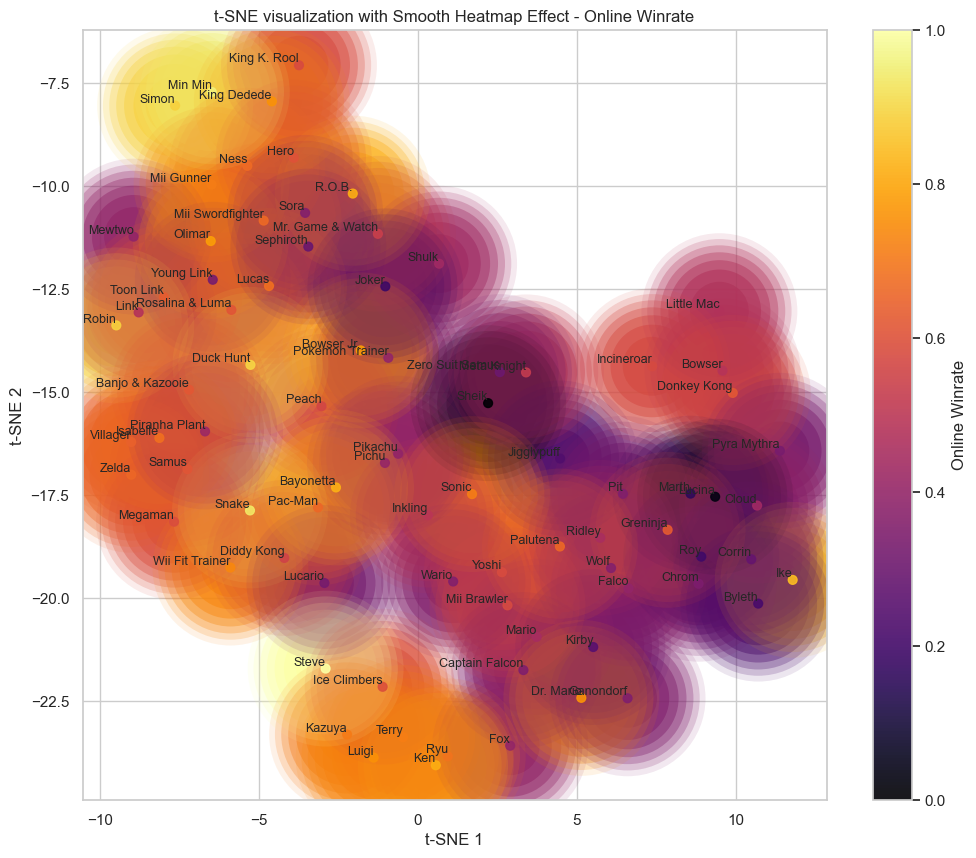

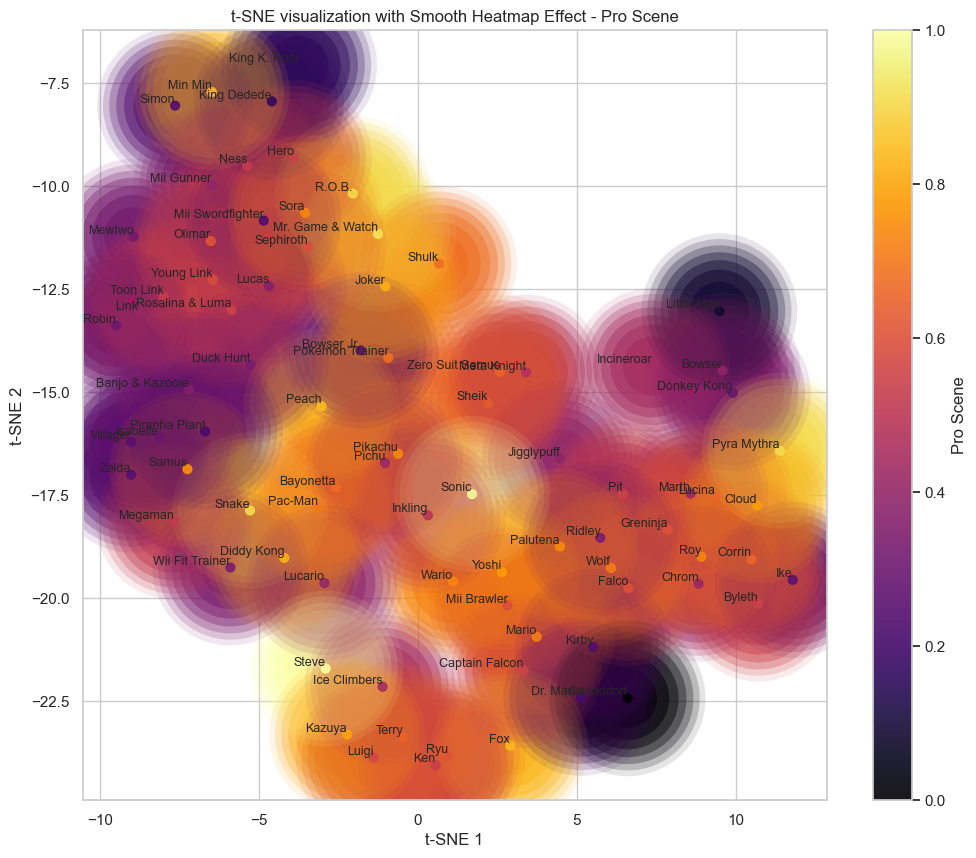

In [9]:
def compute_tsne(data_scaled, n_components=2, perplexity=18, learning_rate=200, n_iter=10000, random_state=42):
    """Compute t-SNE embedding of the dataset."""
    tsne = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, n_iter=n_iter, random_state=random_state)
    tsne_results = tsne.fit_transform(data_scaled)
    return tsne_results

def plot_tsne_heatmap(tsne_results, labels, names, label_name, glow_size_factor=1.0, title='t-SNE Heatmap Visualization'):
    """Plot t-SNE results with smooth color erosion."""
    cmap = plt.cm.inferno  # High-contrast colormap
    norm = Normalize(vmin=min(labels), vmax=max(labels))  # Normalize color scale

    plt.figure(figsize=(12, 10))
    # Fine-tuned glow effect
    num_layers = 7  # Increased number of layers for smoother gradient
    base_size = 20  # Starting size for the smallest layer
    alpha_values = np.linspace(0.6, 0.1, num_layers)  # Linear space for alpha values
    sizes = [base_size * (i + 1) * glow_size_factor for i in range(num_layers)]  # Incremental sizes

    for size, alpha in zip(sizes, alpha_values):
        plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=size, c=labels, cmap=cmap, norm=norm, alpha=alpha, edgecolor='none')

    # Main scatter plot for the actual points with labels
    scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=40, c=labels, cmap=cmap, norm=norm, alpha=0.9)

    # Adding labels to each point
    for i, txt in enumerate(names):
        plt.annotate(txt, (tsne_results[i, 0], tsne_results[i, 1]), fontsize=9, ha='right', va='bottom')

    plt.colorbar(scatter, label=label_name)
    plt.title(title)
    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.show()

columns_dropped_for_tsne = ['pro_scene', 'online_winrate', 'popularity']
df_tsne = df.copy().drop(columns=columns_dropped_for_tsne)
tsne_results = compute_tsne(df_tsne)

# Plot for online winrate
plot_tsne_heatmap(tsne_results, df['online_winrate'], df.index, 'Online Winrate', glow_size_factor=90, title='t-SNE visualization with Smooth Heatmap Effect - Online Winrate')

# Plot for pro scene
plot_tsne_heatmap(tsne_results, df['pro_scene'], df.index, 'Pro Scene', glow_size_factor=90, title='t-SNE visualization with Smooth Heatmap Effect - Pro Scene')

In [10]:
def drop_columns(df, columns_to_drop):
    """Drop specified columns from DataFrame and return new DataFrame."""
    return df.drop(columns=columns_to_drop)

def find_closest_characters(df, character_name, top_n=5):
    """
    Finds the closest characters in the dataset based on Euclidean distance.
    Args:
    df (pd.DataFrame): DataFrame containing all characters and their features.
    character_name (str): Name of the character to find the closest matches for.
    top_n (int): Number of closest characters to return.

    Returns:
    pd.DataFrame: DataFrame containing the details and distances of the closest characters.
    """
    # Normalize the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns, index=df.index)  # Preserve the index

    # Select the target character features
    target_character = df_scaled.loc[character_name]

    # Calculate the Euclidean distances from the target to all others
    distances = df_scaled.apply(lambda x: distance.euclidean(x, target_character), axis=1)

    # Ignore the self distance by setting it to infinity
    distances[character_name] = float('inf')

    # Find the indices of the top_n closest characters
    closest_indices = distances.nsmallest(top_n).index
    closest_distances = distances.loc[closest_indices]

    # Return the details of the closest characters, include distances
    result = df.loc[closest_indices].copy()
    result['Distance'] = closest_distances.values

    return result

# Example usage
columns_to_drop = ['Cluster']  # Adjust as needed
df = drop_columns(df_clusters, columns_to_drop)

# Loop through each character in the DataFrame and perform the analysis
if compute_close_graphs:
    for character_name in df.index:
        closest_characters = find_closest_characters(df, character_name)
        closest_characters.to_csv(f'comparaisons/closest_to_{character_name}.csv')